In [1]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
import pylab as P
from assimulo.problem import Explicit_Problem  
from assimulo.solvers import GLIMDA 
import wx
import openfile
import parseodes
import solveodes
import selectprocess
import inputtimes

In [2]:
from ctypes import *

In [2]:
templib = cdll.LoadLibrary('./libOdeConstruction.so')
ode_convert = templib.callCPiWB

In [3]:
filepath, filename = openfile.getFilePath()
cpi_defs = openfile.readFileContent(filepath)
process_list = parseodes.parse_process(cpi_defs)

Selected cpi file: kaiABC


In [4]:
process = selectprocess.selectapro(process_list)

Selected process: Kai


In [5]:
species_list = parseodes.parse_species(cpi_defs, process)
odes, initial_concentrations, ode_num = parseodes.parse_odes(ode_convert, cpi_defs, process)
diff_odes, name_copy = solveodes.preodes(odes)
# for ode in odes:
#     print(ode)
# print initial_concentrations

In [7]:
t0, tfinal,tdivide = inputtimes.timeforodeint()

Time Start: 0.0, Time End: 100.0.
Input number of times: 0. You can only use rhs solver to simulate this process.


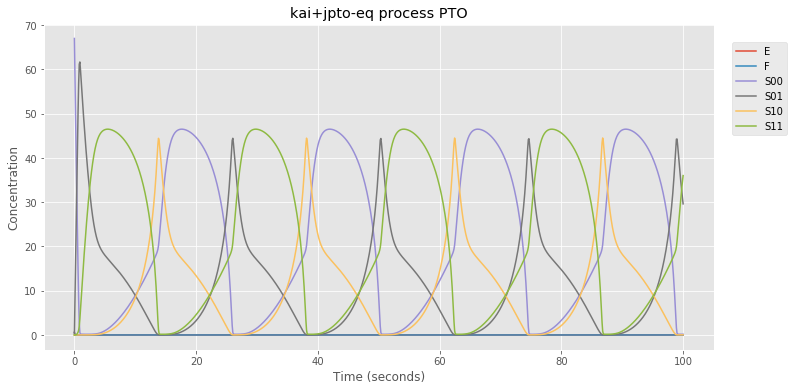

In [7]:
times = np.linspace(t0, tfinal, tdivide)

def odeint_fun(w, t):
    exec(name_copy)
    temp_fun = np.array([])
    for diff_ode in diff_odes:
        temp_fun = np.append(temp_fun, (eval(diff_ode)))
    return temp_fun

solution_int = integrate.odeint(odeint_fun, initial_concentrations, times)
solveodes.plotodes(filename, process, species_list, solution_int, times)

Final Run Statistics: Linear Test ODE 

 Number of steps                           : 1279
 Number of function evaluations            : 6908
 Number of Jacobian evaluations            : 2329
 Number of error test failures             : 5
 Number of LU decompositions               : 2329
 Number of nonlinear convergence failures  : 43

Solver options:

 Solver                  : GLIMDA (implicit)
 Tolerances (absolute)   : 1e-06
 Tolerances (relative)   : 1e-06

Simulation interval    : 0.0 - 100.0 seconds.
Elapsed simulation time: 351.09 seconds.


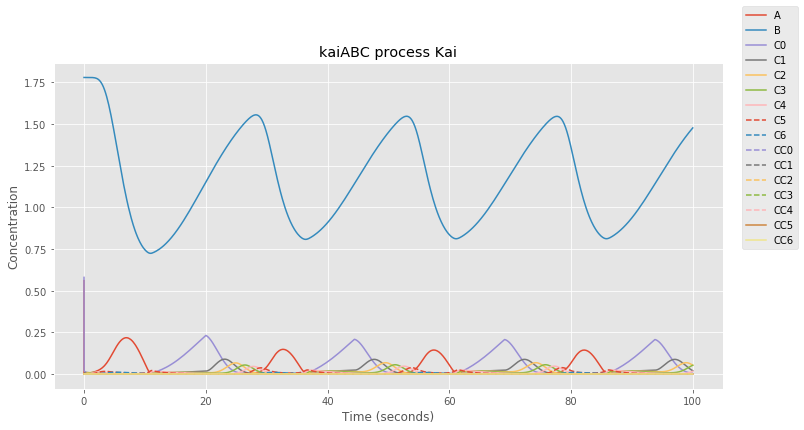

In [8]:
def rhs(t,w):    
    exec(name_copy)
    temp_fun = np.array([])
    for diff_ode in diff_odes:
        temp_fun = np.append(temp_fun, (eval(diff_ode)))
    return temp_fun

t, solution_rhs = solveodes.solvecomplex(rhs, initial_concentrations, t0, tfinal)
solveodes.plotodes(filename, process, species_list, solution_rhs, t)